### HW5 - Dimensionality Reduction on PIMCO Total Return Bond Fund Adjusted Daily Close Price
David Mohammadi
IE598

In [165]:
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

#### Part 1: Exploratory Data Analysis

Describe the data set sufficiently using the methods and visualizations that we used previously.  Include any output, graphs, tables, that you think is necessary to represent the data.  Label your figures and axes. DO NOT INCLUDE CODE, only output figures!
Split data into training and test sets.  Use random_state = 42. Use 85% of the data for the training set.  Use the same split for all experimhw5_treasury yield curve dataents.

In [166]:
#Import data and drop both NA Values and Date Column
df1 = pd.read_csv(r"C:\Users\dmoha\Downloads\hw5_treasury yield curve data.csv")
df2 = df1.dropna()

df = df2.iloc[:, 1:]
df.head()

,SVENF01,SVENF02,SVENF03,SVENF04,SVENF05,SVENF06,SVENF07,SVENF08,SVENF09,SVENF10,...,SVENF22,SVENF23,SVENF24,SVENF25,SVENF26,SVENF27,SVENF28,SVENF29,SVENF30,Adj_Close
0,2.1224,2.0266,2.1023,2.2377,2.3790,2.5042,2.6069,2.6885,2.7530,2.8054,...,3.3355,3.3876,3.4400,3.4925,3.5446,3.5962,3.6471,3.6970,3.7458,10.130177
1,2.1239,2.0317,2.1096,2.2468,2.3901,2.5171,2.6217,2.7049,2.7710,2.8247,...,3.3574,3.4091,3.4610,3.5130,3.5646,3.6156,3.6660,3.7153,3.7636,10.130177
2,2.0874,1.9956,2.0844,2.2289,2.3736,2.4980,2.5984,2.6779,2.7418,2.7951,...,3.3589,3.4086,3.4575,3.5055,3.5524,3.5980,3.6421,3.6847,3.7257,10.150118
3,2.1319,2.0559,2.1451,2.2856,2.4257,2.5461,2.6428,2.7188,2.7791,2.8289,...,3.3940,3.4485,3.5029,3.5568,3.6099,3.6622,3.7132,3.7630,3.8113,10.130177
4,2.1051,2.0234,2.1180,2.2632,2.4051,2.5248,2.6198,2.6940,2.7532,2.8029,...,3.3712,3.4227,3.4735,3.5234,3.5722,3.6196,3.6655,3.7098,3.7525,10.130177


In [167]:
summary = df.describe()
print(summary)

           SVENF01      SVENF02      SVENF03      SVENF04      SVENF05  \
count  8071.000000  8071.000000  8071.000000  8071.000000  8071.000000   
mean      3.785311     4.258972     4.669363     5.022430     5.318493   
std       2.648060     2.498137     2.341348     2.221632     2.137801   
min       0.072700     0.327300     0.630300     1.013000     1.424500   
25%       1.144050     1.865600     2.536550     3.023050     3.544700   
50%       3.986500     4.393300     4.505500     4.718900     5.051300   
75%       5.901500     6.221250     6.461300     6.626600     6.779550   
max       9.813800     9.887800    10.145600    10.459900    10.649900   

           SVENF06      SVENF07      SVENF08      SVENF09      SVENF10  ...  \
count  8071.000000  8071.000000  8071.000000  8071.000000  8071.000000  ...   
mean      5.559644     5.750071     5.895135     6.000596     6.072112  ...   
std       2.080405     2.040337     2.010786     1.987244     1.966960  ...   
min       1.69820

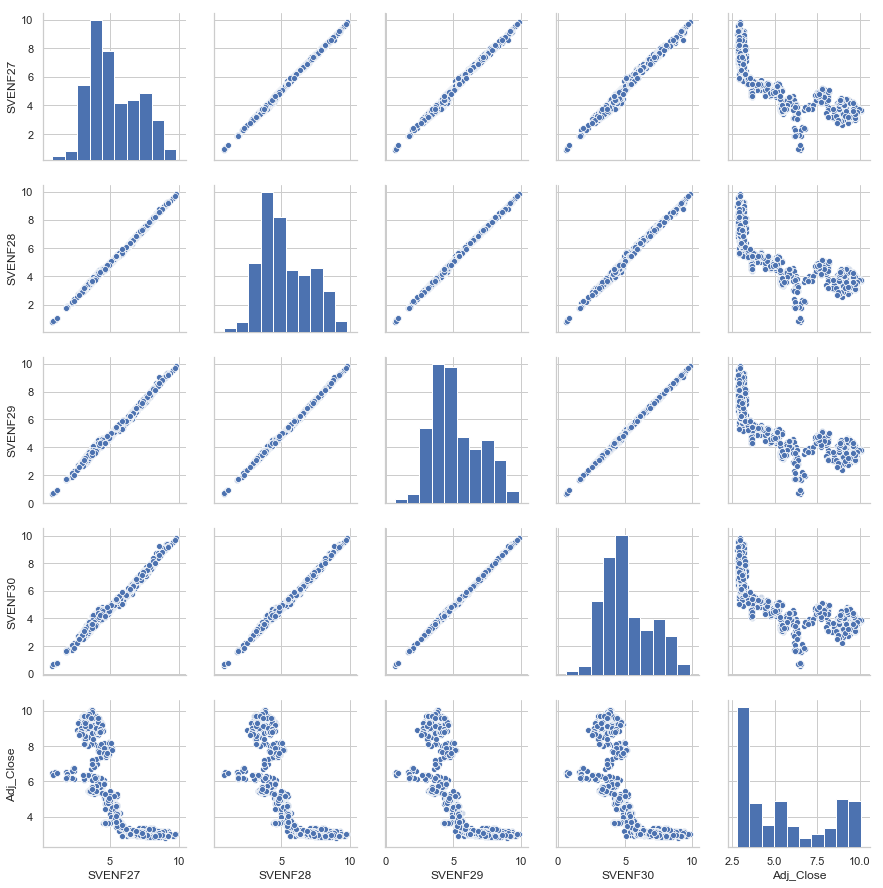

In [168]:
#Scatterplot matrix of SVENF27 to SVENF30 and ADJ_Close (Only took 1000 randomly selected values to speed up the output generation)
sns.set(style='whitegrid', context='notebook')
sns.pairplot(df.iloc[:, -5:].sample(n=1000, random_state=42), height = 2.5);
plt.show()

In [169]:
#Train test split: 85% training set | 15% test set
X = df.iloc[:, :-1].values
y = df['Adj_Close'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

#### Part 2: Perform a PCA on the Treasury Yield dataset
Compute and display the explained variance ratio for all components, then recalculate and display on n_components=3.


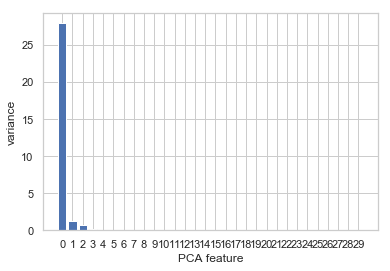

In [170]:
pca = PCA()
scaler = StandardScaler()
pipeline = make_pipeline(scaler, pca)
pipeline.fit(X_train)

features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features)
plt.show()

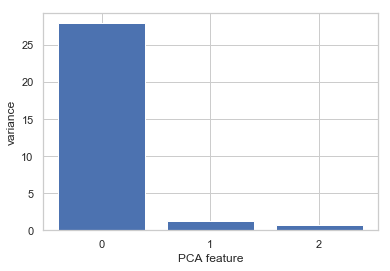

In [171]:
pca = PCA(n_components = 3)
scaler = StandardScaler()
pipeline = make_pipeline(scaler, pca)
pipeline.fit(X_train)

features = range(3)
plt.bar(features, pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features)
plt.show()

#### Part 3.a: Logistic regression classifier v. SVM classifier - baseline
Fit a linear classifier model to both datasets (the original dataset with 30 attributes and the PCA transformed dataset with 3 PCs.) using SKlearn.  Calculate its accuracy R2 score and RMSE for both in sample and out of sample (train and test sets).  (You may use CV accuracy score if you wish).



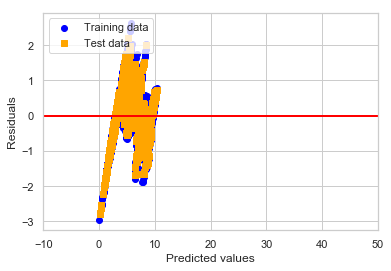

[Train Set] Original Dataset R^2: 0.9022730353400409
[Train Set] Original Dataset Root Mean Squared Error: 0.7766533040369977
[Test Set] Original Dataset R^2: 0.9041309535336528
[Test Set] Original Dataset Root Mean Squared Error: 0.7823695855060564


In [176]:
#Linear regression model on original dataset
slr = LinearRegression()
slr.fit(X_train, y_train)

y_train_pred = slr.predict(X_train)
y_test_pred = slr.predict(X_test)

plt.scatter(y_train_pred, y_train_pred - y_train, 
             c='blue', marker='o', label='Training data')
plt.scatter(y_test_pred,  y_test_pred - y_test,
             c='orange', marker='s', label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=50, lw=2, color='red')
plt.xlim([-10, 50])
plt.show()

# Compute and print R^2 and RMSE 


y_pred_OG_tr = slr.predict(X_train)
print("[Train Set] Original Dataset R^2: {}".format(slr.score(X_train, y_train)))
rmse_OG_tr = np.sqrt(mean_squared_error(y_train, y_pred_OG_tr))
print("[Train Set] Original Dataset Root Mean Squared Error: {}".format(rmse_OG_tr))

y_pred_OG = slr.predict(X_test)
print("[Test Set] Original Dataset R^2: {}".format(slr.score(X_test, y_test)))
rmse_OG = np.sqrt(mean_squared_error(y_test, y_pred_OG))
print("[Test Set] Original Dataset Root Mean Squared Error: {}".format(rmse_OG))

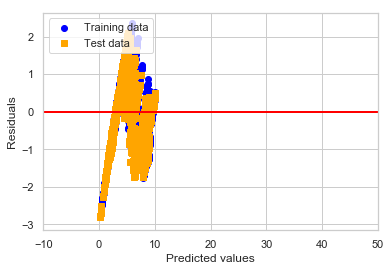

[Train Set] PCA Transformed R^2: 0.867540508213125
[Train Set] PCA Transformed Root Mean Squared Error: 0.9041938136836064
[Test Set] PCA Transformed R^2: 0.863152519558086
[Test Set] PCA Transformed Root Mean Squared Error: 0.9347407108978245


In [177]:
#Linear regression model on PCA components
#Some code derived from: https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60
slr1 = LinearRegression()
pca_X = pca.fit_transform(X_train)
pca_X_test = pca.fit_transform(X_test)
slr1.fit(pca_X, y_train)

y_train_pred = slr1.predict(pca_X)
y_test_pred = slr1.predict(pca_X_test)

plt.scatter(y_train_pred, y_train_pred - y_train, c='blue', marker='o', label='Training data')
plt.scatter(y_test_pred,  y_test_pred - y_test, c='orange', marker='s', label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=50, lw=2, color='red')
plt.xlim([-10, 50])
plt.show()

# Compute and print R^2 and RMSE 
y_pred_PCA_tr = slr1.predict(pca_X)
print("[Train Set] PCA Transformed R^2: {}".format(slr1.score(pca_X, y_train)))
rmse_PCA_tr = np.sqrt(mean_squared_error(y_train, y_pred_PCA_tr))
print("[Train Set] PCA Transformed Root Mean Squared Error: {}".format(rmse_PCA_tr))

y_pred_PCA = slr1.predict(pca_X_test)
print("[Test Set] PCA Transformed R^2: {}".format(slr1.score(pca_X_test, y_test)))
rmse_PCA = np.sqrt(mean_squared_error(y_test, y_pred_PCA))
print("[Test Set] PCA Transformed Root Mean Squared Error: {}".format(rmse_PCA))



#### Part 3.b: Logistic regression classifier v. SVM classifier - baseline
Fit a SVM regressor model to both datasets using SKlearn.  Calculate its accuracy R2 score and RMSE for both in sample and out of sample (train and test sets).  (You may use CV accuracy score if you wish).

In [178]:
#SVM Regressor model fit to original dataset

X_train_OG = X_train.astype(int)
y_train_OG = y_train.astype(int)
X_test_OG = X_test.astype(int)
y_test_OG = y_test.astype(int)

svm_train = SVC(kernel="linear")
svm_train.fit(X_train_OG, y_train_OG)

svm_test = SVC(kernel="linear")
svm_test.fit(X_test_OG, y_test_OG)

#print("[Train] Number of original examples", len(X_train_OG))
#print("[Train] Number of support vectors", len(svm_train.support_))

#print("[Test] Number of original examples", len(X_test_OG))
#print("[Test] Number of support vectors", len(svm_test.support_))

X_train_OG_small = X_train_OG[svm_train.support_]
y_train_OG_small = y_train_OG[svm_train.support_]

X_test_OG_small = X_test_OG[svm_test.support_]
y_test_OG_small = y_test_OG[svm_test.support_]

svm_small = SVC(kernel="linear")
svm_small.fit(X_train_OG_small.astype(int), y_train_OG_small.astype(int))

y_train_pred = svm_small.predict(X_train_OG_small)
y_test_pred = svm_small.predict(X_test_OG_small)

print("[Train Set] SVM-Original Dataset R^2: {}".format(svm_train.score(X_train_OG_small, y_train_OG_small)))
rmse_og_svm_tr = np.sqrt(mean_squared_error(y_train_OG_small, y_train_pred))
print("[Train Set] SVM-Original Dataset Mean Squared Error: {}".format(rmse_og_svm_tr))

print("[Test Set] SVM-Original Dataset R^2: {}".format(svm_train.score(X_test_OG_small, y_test_OG_small)))
rmse_og_svm_tst = np.sqrt(mean_squared_error(y_test_OG_small, y_test_pred))
print("[Test Set] SVM-Original Dataset Root Mean Squared Error: {}".format(rmse_og_svm_tst))


[Train Set] SVM-Original Dataset R^2: 0.6871945259042033
[Train Set] SVM-Original Dataset Mean Squared Error: 0.5722483994683053
[Test Set] SVM-Original Dataset R^2: 0.7290748898678414
[Test Set] SVM-Original Dataset Root Mean Squared Error: 0.5473202639822856


In [179]:
#SVM Regressor model fit to PCA dataset

X_train_PCA = (pca.fit_transform(X_train)).astype(int)
y_train_PCA = y_train.astype(int)
X_test_PCA = (pca.fit_transform(X_test)).astype(int)
y_test_PCA = y_test.astype(int)

pca_X_train = pca.fit_transform(X_train_PCA)
pca_X_test = pca.fit_transform(X_test_PCA)

svm_pca_train = SVC(kernel="linear")
svm_pca_test = SVC(kernel="linear")

svm_pca_train.fit(pca_X_train, y_train_PCA)
svm_pca_test.fit(pca_X_test, y_test_PCA)

X_train_PCA_small = X_train_PCA[svm_pca_train.support_]
y_train_PCA_small = y_train_PCA[svm_pca_train.support_]

X_test_PCA_small = X_test_PCA[svm_pca_test.support_]
y_test_PCA_small = y_test_PCA[svm_pca_test.support_]

svm_PCA_small = SVC(kernel="linear")
svm_PCA_small.fit(X_train_PCA_small.astype(int), y_train_PCA_small.astype(int))

y_train_PCA_pred = svm_PCA_small.predict(X_train_PCA_small)
y_test_PCA_pred = svm_PCA_small.predict(X_test_PCA_small)

print("[Train Set] SVM-PCA Transformed R^2: {}".format(svm_PCA_small.score(X_train_PCA_small, y_train_PCA_small)))
rmse_PCA_svm_tr = np.sqrt(mean_squared_error(y_train_PCA_small, y_train_PCA_pred))
print("[Train Set] SVM-PCA Root Mean Squared Error: {}".format(rmse_PCA_svm_tr))

print("[Test Set] SVM-PCA Transformed R^2: {}".format(svm_PCA_small.score(X_test_PCA_small, y_test_PCA_small)))
rmse_PCA_svm_tst = np.sqrt(mean_squared_error(y_test_PCA_small, y_test_PCA_pred))
print("[Test Set] SVM-PCA Root Mean Squared Error: {}".format(rmse_PCA_svm_tst))

[Train Set] SVM-PCA Transformed R^2: 0.5545112781954887
[Train Set] SVM-PCA Root Mean Squared Error: 0.7340620667181258
[Test Set] SVM-PCA Transformed R^2: 0.5168918918918919
[Test Set] SVM-PCA Root Mean Squared Error: 0.8022350535105538


In [1]:
print("My name is David Mohammadi")
print("My NetID is: dmohamm2")
print("I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.")

My name is David Mohammadi
My NetID is: dmohamm2
I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.
